#### Assignment 0
Each one of the datasets has properties which makes
them hard to learn. Motivate which of the three problems is most
difficult for a decision tree algorithm to learn.

True concepts behind the MONK datasets are as following:  
MONK-1 (a1 = a2) ∨ (a5 = 1)  
MONK-2 ai = 1 for exacly two i ∈ {1, 2, . . . , 6}  
MONK-3 (a5 = 1 ∧ a4 = 1) ∨ (a5 != 4 ∧ a2 != 3)  
And I think monk2 is most difficult to learn beacause it covers all the attributes. And we can't classify the trees into small trees depending on an attribute equal to a specific value. 

#### Assignment 1
The file dtree.py defines a function entropy which
calculates the entropy of a dataset. Import this file along with the
monks datasets and use it to calculate the entropy of the training
datasets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dtree as dt
import monkdata as md
import random

print("Entroy of Monk-1:", dt.entropy(md.monk1)) 
print("Entroy of Monk-2:", dt.entropy(md.monk2))
print("Entroy of Monk-3:", dt.entropy(md.monk3))

Entroy of Monk-1: 1.0
Entroy of Monk-2: 0.957117428264771
Entroy of Monk-3: 0.9998061328047111


#### Assignment 2
Explain entropy for a uniform distribution and a non-uniform distribution, present some example distributions with high and low entropy.

Answer: For a uniform distribution, the entropy equals log n, in positive corelation with the number of outcomes. For example, n = 2 in the case of toosing a coin. And n = 6 considering rolling a die. The later one's entropy is higher.
For a non-uniform distribution, the entropy is equal or lower than the case of uniform distribution. Because the probability of some cases is higher and they are more likely to happen, which means we need less information to make a decision. 

#### Assignment 3
Use the function averageGain (defined in dtree.py)
to calculate the expected information gain corresponding to each of
the six attributes. Note that the attributes are represented as instances of the class Attribute (defined in monkdata.py) which you
can access via m.attributes[0], ..., m.attributes[5]. Based on
the results, which attribute should be used for splitting the examples
at the root node?

For Monk-1 and Monk-2, a5. For Monk-3,  a2.
We also need to pay attention to the number of different cases for an attribute. For example if there are 93 cases of a5 = 1 but 7 cases of a5 = 2, and in this situation, even a5's information gain is greater. We may not choose a5 to make next layer's decision.

In [2]:
for i in range(0, 6):
    print("The expected information gain corresponding to a%d" %(i + 1), "of Monk-1:", dt.averageGain(md.monk1, md.attributes[i]))

print()
print()
for i in range(0, 6):
    print("The expected information gain corresponding to a%d" %(i + 1), "of Monk-2:", dt.averageGain(md.monk2, md.attributes[i]))
print()
print()
for i in range(0, 6):
    print("The expected information gain corresponding to a%d" %(i + 1), "of Monk-3:", dt.averageGain(md.monk3, md.attributes[i]))

The expected information gain corresponding to a1 of Monk-1: 0.07527255560831925
The expected information gain corresponding to a2 of Monk-1: 0.005838429962909286
The expected information gain corresponding to a3 of Monk-1: 0.00470756661729721
The expected information gain corresponding to a4 of Monk-1: 0.02631169650768228
The expected information gain corresponding to a5 of Monk-1: 0.28703074971578435
The expected information gain corresponding to a6 of Monk-1: 0.0007578557158638421


The expected information gain corresponding to a1 of Monk-2: 0.0037561773775118823
The expected information gain corresponding to a2 of Monk-2: 0.0024584986660830532
The expected information gain corresponding to a3 of Monk-2: 0.0010561477158920196
The expected information gain corresponding to a4 of Monk-2: 0.015664247292643818
The expected information gain corresponding to a5 of Monk-2: 0.01727717693791797
The expected information gain corresponding to a6 of Monk-2: 0.006247622236881467


The expected 

#### Assignment 4
For splitting we choose the attribute that maximizes
the information gain, Eq.3. Looking at Eq.3 how does the entropy of
the subsets, Sk, look like when the information gain is maximized?
How can we motivate using the information gain as a heuristic for
picking an attribute for splitting? Think about reduction in entropy
after the split and what the entropy implies.

The lower the sum of entropy of the subeset, the greater the information gain.
We pick the attribute which makes the information gain maximized for spiliting, which means the expected reduction of the entroypy is maxmized. And when the entropy is lower, it tells us more about the answer and  we need less information for making a decision.

In [3]:
best = dt.bestAttribute(md.monk1, md.attributes)
subset1 = dt.select(md.monk1, best, 1)
subset2 = dt.select(md.monk1, best, 2) + dt.select(md.monk1,best, 3) + dt.select(md.monk1, best, 4)
print()
for i in range(0, 6):
    print("The expected information gain corresponding to a%d" %(i + 1), "of subset1:",dt.averageGain(subset1, md.attributes[i]))
print()
for i in range(0, 6):
    print("The expected information gain corresponding to a%d" %(i + 1), "of subset2:",dt.averageGain(subset2, md.attributes[i]))



The expected information gain corresponding to a1 of subset1: 0.0
The expected information gain corresponding to a2 of subset1: 0.0
The expected information gain corresponding to a3 of subset1: 0.0
The expected information gain corresponding to a4 of subset1: 0.0
The expected information gain corresponding to a5 of subset1: 0.0
The expected information gain corresponding to a6 of subset1: 0.0

The expected information gain corresponding to a1 of subset2: 0.05830506026240112
The expected information gain corresponding to a2 of subset2: 0.005159452083591476
The expected information gain corresponding to a3 of subset2: 0.0024837513000560696
The expected information gain corresponding to a4 of subset2: 0.04241942200317339
The expected information gain corresponding to a5 of subset2: 0.0010833534040218806
The expected information gain corresponding to a6 of subset2: 0.0011615153088733177


#### Assignment 5
Build the full decision trees for all three Monk
datasets using buildTree. Then, use the function check to measure the performance of the decision tree on both the training and
test datasets.
For example to built a tree for monk1 and compute the performance
on the test data you could use  
import monkdata as m  
import dtree as d  
t=d.buildTree(m.monk1, m.attributes);  
print(d.check(t, m.monk1test))  
Compute the train and test set errors for the three Monk datasets
for the full trees. Were your assumptions about the datasets correct?
Explain the results you get for the training and test datasets.

The overfitting happens because the model is too complex. And we need pruning to improve the model.

In [4]:
tree1 = dt.buildTree(md.monk1,md.attributes)
print("train set errors of Monk-1:", 1 - dt.check(tree1, md.monk1))
print("test set errors of Monk-1:", 1 - dt.check(tree1, md.monk1test))
print()
tree2 = dt.buildTree(md.monk2,md.attributes)
print("train set errors of Monk-2:", 1 - dt.check(tree2, md.monk2))
print("test set errors of Monk-2:", 1 - dt.check(tree2, md.monk2test))
print()
tree3 = dt.buildTree(md.monk3,md.attributes)
print("train set errors of Monk-3:", 1 - dt.check(tree3, md.monk3))
print("test set errors of Monk-3:", 1 - dt.check(tree3, md.monk3test))


train set errors of Monk-1: 0.0
test set errors of Monk-1: 0.17129629629629628

train set errors of Monk-2: 0.0
test set errors of Monk-2: 0.30787037037037035

train set errors of Monk-3: 0.0
test set errors of Monk-3: 0.05555555555555558


#### Assignment 6
Explain pruning from a bias variance trade-off perspective.

Without pruning, the decision model performs well in train set but generalizes poorly. It is known to all that the more complex the model, the higher the variance, the lower the bias. And the case is that we should make the variance lower, and the bias higher. We need pruning by removing some nodes to simplify the model and achieve a balance between bias and variance.


#### Assignment 7
Evaluate the effect pruning has on the test error for
the monk1 and monk3 datasets, in particular determine the optimal
partition into training and pruning by optimizing the parameter
fraction. Plot the classification error on the test sets as a function
of the parameter fraction ∈ {0.3, 0.4, 0.5, 0.6, 0.7, 0.8}.
Note that the split of the data is random. We therefore need to
compute the statistics over several runs of the split to be able to draw
any conclusions. Reasonable statistics includes mean and a measure
of the spread. Do remember to print axes labels, legends and data
points as you will not pass without them.

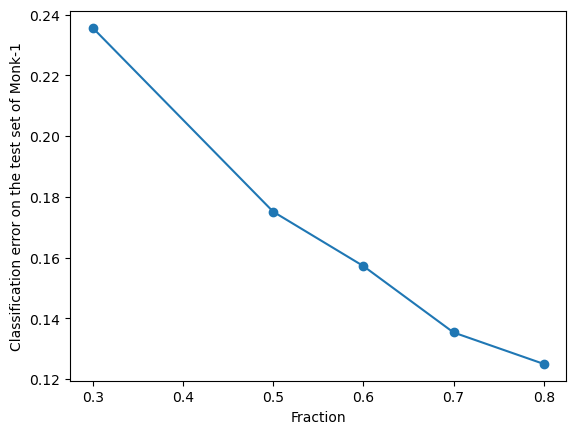

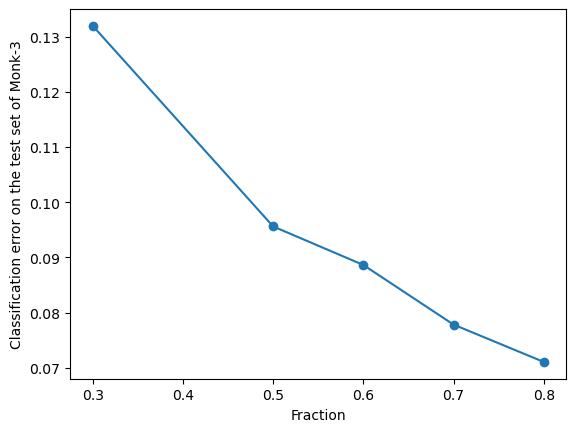

In [5]:
def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

def meanError(dataset,ratio):
    turn = 1000
    acc = 0
    while(turn > 0):
        monktrain, monkval = partition(dataset, ratio)
        tree = dt.buildTree(monktrain,md.attributes)
        treeList = dt.allPruned(tree)
        accuracy = [dt.check(t, monkval)for t in treeList]
        acc += max(accuracy)
        turn -= 1
    return 1 - acc / 1000

fraction = (0.3, 0.5, 0.6, 0.7, 0.8)
accs1 = [meanError(md.monk1, i) for i in fraction]
accs3 = [meanError(md.monk3, i) for i in fraction]
plt.figure()
plt.plot(fraction, accs1, marker = 'o')
plt.xlabel("Fraction")
plt.ylabel("Classification error on the test set of Monk-1")
plt.show()

plt.figure()
plt.plot(fraction, accs3, marker = 'o')
plt.xlabel("Fraction")
plt.ylabel("Classification error on the test set of Monk-3")
plt.show()